## Basic Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [69]:
data_ball = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
data_match = pd.read_csv('IPL Matches 2008-2020.csv')
df_ball = data_ball.copy()
df_match = data_match.copy()

## Preliminary Analysis

### Data Preview

In [217]:
data_ball.head()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [218]:
data_match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [221]:
print('Rows in matches datafame:', data_match.shape[0])
print('Rows in balls datafame:', data_ball.shape[0])

Rows in matches datafame: 816
Rows in balls datafame: 193468


In [230]:
## Total matches
df_match.shape[0]

816

In [231]:
## Total cities
df_match['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [232]:
## Total teams
df_match['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [235]:
## Summary statistics of numerical columns for balls data set
df_ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [236]:
## Summary statistics of numerical columns for matches data set
df_match.describe()

,id,date,neutral_venue,result_margin,year
count,8.160000e+02,816,816.000000,799.000000,816.000000
mean,7.563496e+05,2014-04-13 19:07:03.529411840,0.094363,17.321652,2013.926471
min,3.359820e+05,2008-04-18 00:00:00,0.000000,1.000000,2008.000000
25%,5.012278e+05,2011-04-26 18:00:00,0.000000,6.000000,2011.000000
50%,7.292980e+05,2014-04-23 12:00:00,0.000000,8.000000,2014.000000
75%,1.082626e+06,2017-04-30 00:00:00,0.000000,19.500000,2017.000000
max,1.237181e+06,2020-11-10 00:00:00,1.000000,146.000000,2020.000000
std,3.058943e+05,NaN,0.292512,22.068427,3.665054


## Particular batsman analysis

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def analyze_batsman(batsman):
    df = df_ball[df_ball['batsman'].str.contains(batsman)]
    df_bats = df['batsman_runs'].value_counts().reset_index()
    df_bats['total_runs'] = df_bats['batsman_runs'] * df_bats['count']

    # Set style and context for seaborn
    fig, ax = plt.subplots(2, 1, figsize=(12,12))

    # Create count plot for dismissals
    plt.sca(ax[0])
    sns.countplot(data=df, x='dismissal_kind', palette='Set2')
    plt.title('Dismissals for ' + batsman, fontsize=16, fontweight='bold')
    plt.xlabel('Dismissal Kind')
    plt.ylabel('Total Dismissals')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Create bar plot for run distribution
    plt.sca(ax[1])
    plt.title('Runs Distribution for ' + batsman)
    sns.barplot(data = df_bats, x = df_bats['batsman_runs'], y = df_bats['total_runs'], palette='Set2')
    plt.title(label='Run Distribution for ' + batsman, fontsize=16, fontweight='bold')
    plt.xlabel('Runs per Bat')
    plt.ylabel('Total Runs')

    plt.tight_layout(pad=3)
    plt.show()


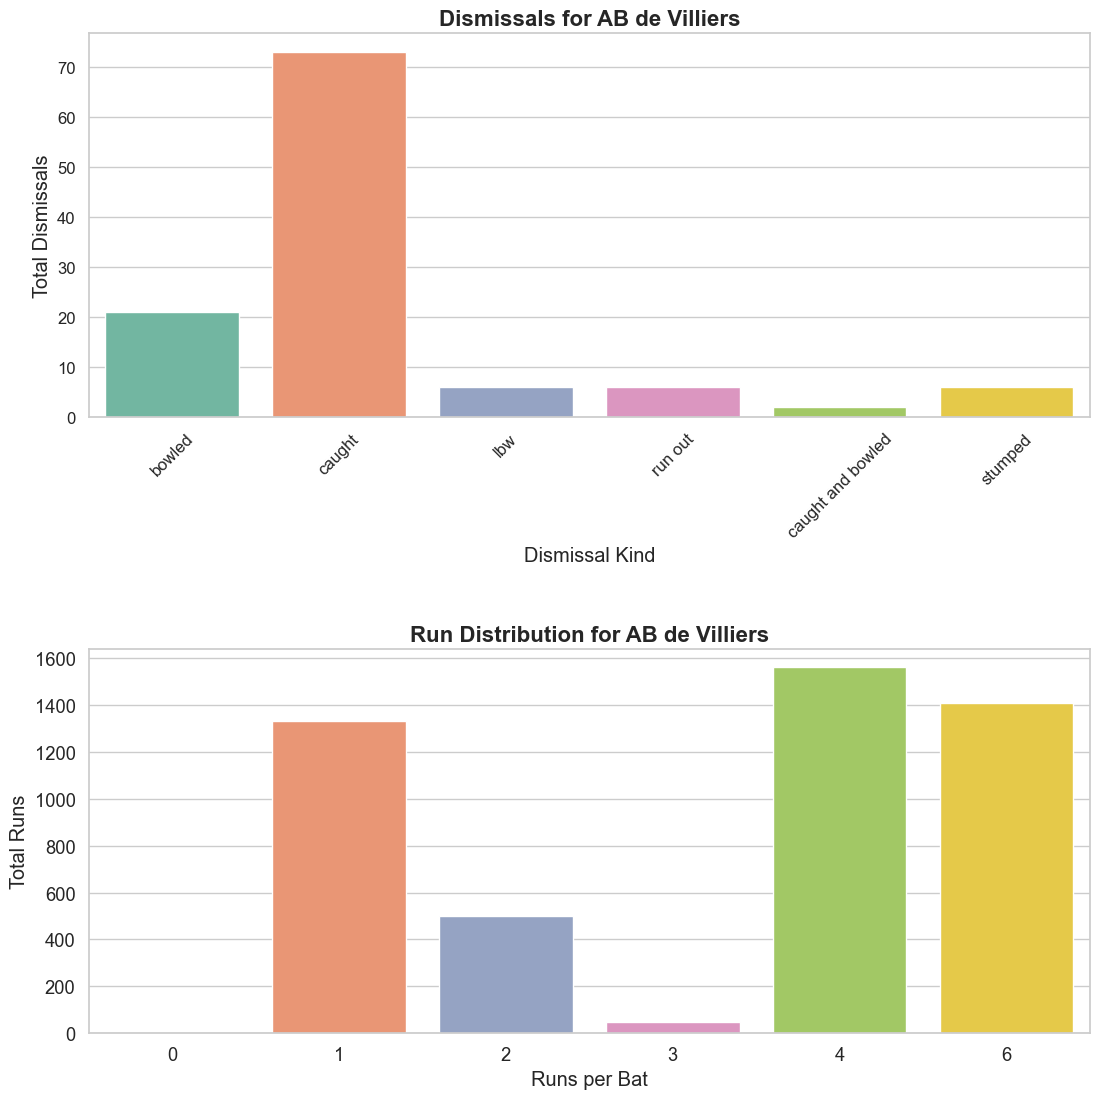

In [158]:
analyze_batsman('AB de Villiers')

### AB de Villiers gets dismissed mostly by getting caught. He scores most of his run by hitting fours at each bat, this is surprising because you would expect either ones or six's being the main source of his runs. 

## Analyze toss decisions across seasons

In [160]:
df_match['date'] = pd.to_datetime(df_match['date'])

In [161]:
df_match['year'] = df_match['date'].dt.year

In [178]:
df_toss = df_match.groupby(['year','toss_decision']).size().reset_index().rename(columns={0:'count'})
total_counts = df_toss.groupby('year')['count'].sum()
df_toss['proportions'] = df_toss.apply(lambda row: row['count'] / total_counts[row['year']], axis=1)

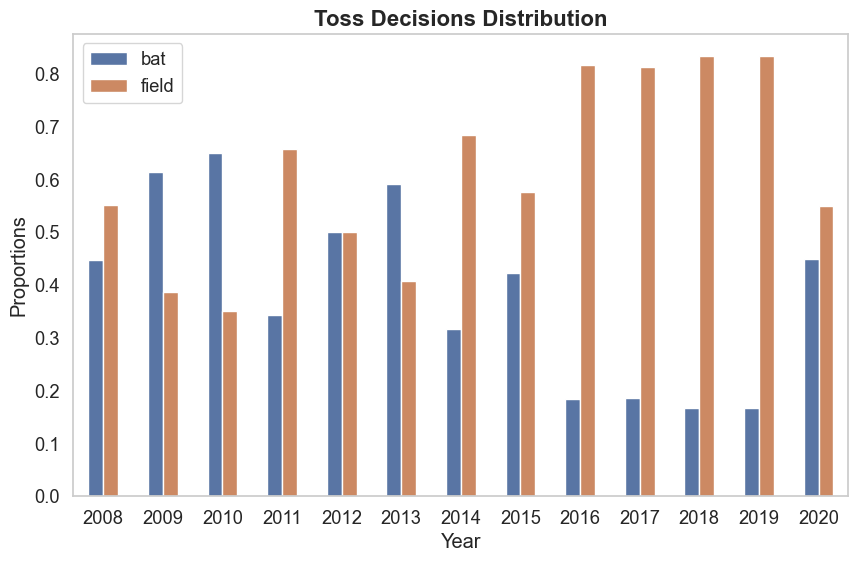

In [183]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_toss, x='year', y='proportions', hue='toss_decision', width=0.5)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportions')
plt.title('Toss Decisions Distribution', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.grid(visible=False)

### Their doesn't seem to be a preference in the toss decision from 2008 to 2013, but after this teams now prefer fielding first.

## Analyze if the toss decision affects if a team wins

In [241]:
df_tw = df_match[['toss_winner','winner']]


In [242]:
def result(row):
    if row[0] == row[1]:return 'Yes'
    else: return 'No'

In [243]:
df_resuts = df_tw.apply(result, axis = 1).value_counts()

In [244]:
import plotly.graph_objects as go

labels = df_resuts.index
values = df_resuts.values

trace = go.Pie(labels=labels, values=values, hole=0.3)

fig = go.Figure(trace)

fig.update_traces(textinfo='label+percent', hoverinfo='label+percent')

### Toss decision doesn't seem to decide whether a team wins or not.

## Which teams have won the most tournaments

In [246]:
from collections import Counter

In [247]:
winners = df_match.groupby('year')['winner'].apply(lambda x : Counter(x).most_common(1)[0][0])

In [248]:
winners_dict = winners.to_dict()

In [249]:
winners_dict

{2008: 'Rajasthan Royals',
 2009: 'Delhi Daredevils',
 2010: 'Mumbai Indians',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kings XI Punjab',
 2015: 'Chennai Super Kings',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians',
 2020: 'Mumbai Indians'}

In [259]:
df_winners = pd.DataFrame(winners_dict,index=['Winner']).transpose().reset_index()
df_winners

,index,Winner
0,2008,Rajasthan Royals
1,2009,Delhi Daredevils
2,2010,Mumbai Indians
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kings XI Punjab
7,2015,Chennai Super Kings
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


Text(0, 0.5, '')

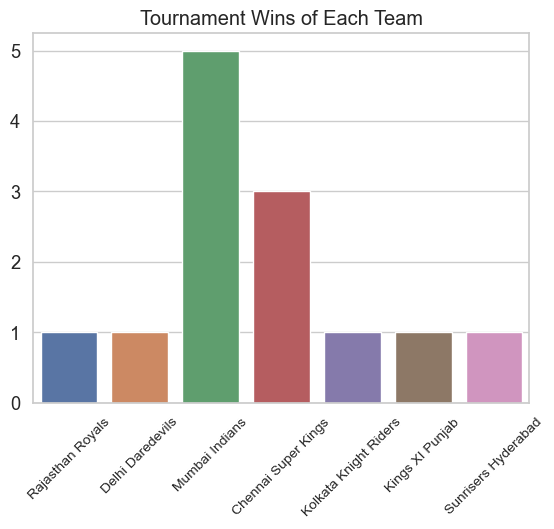

In [266]:
sns.countplot(data=df_winners,x='Winner')
plt.xticks(rotation=45, fontsize=10)
plt.title('Tournament Wins of Each Team')
plt.xlabel('')
plt.ylabel('')

### Mumbai Indians have won the most tournaments from 2008 to 2020.

## Comparitive analysis of teams

In [271]:
df1 = df_match[['id','team1', 'winner']]
df2 = df_match[['id','team2', 'winner']]

In [272]:
df1 = df_match['team1'].value_counts().reset_index().rename(columns={'team1':'team'})
df2 = df_match['team2'].value_counts().reset_index().rename(columns={'team2':'team'})
df3 = df_match['winner'].value_counts().reset_index().rename(columns={'winner':'team'})


In [281]:
df_summary = df1.merge(df2, on='team').merge(df3, on='team')
df_summary['total games'] = df_summary['count_x'] + df_summary['count_y']
df_summary.drop(columns=['count_x','count_y'], inplace=True)

In [283]:
df_summary.rename(columns={'count':'wins'},inplace=True)

In [284]:
df_summary

,team,wins,total games
0,Royal Challengers Bangalore,91,195
1,Mumbai Indians,120,203
2,Kolkata Knight Riders,99,192
3,Chennai Super Kings,106,178
4,Kings XI Punjab,88,190
5,Delhi Daredevils,67,161
6,Rajasthan Royals,81,161
7,Sunrisers Hyderabad,66,124
8,Deccan Chargers,29,75
9,Pune Warriors,12,46


In [285]:
# Create the bar chart
fig = go.Figure()

# Add total games bar
fig.add_trace(go.Bar(x=df_summary['team'], y=df_summary['total games'], name='Total Games'))

# Add wins bar
fig.add_trace(go.Bar(x=df_summary['team'], y=df_summary['wins'], name='Wins'))

# Update layout
fig.update_layout(
    title='Total Games and Wins by Team',
    xaxis_title='Team',
    yaxis_title='Count',
    xaxis_tickangle=45,
    width=800,
    height=600,
    xaxis_tickfont=dict(size=10)
)
# Show the plot
fig.show()

### Established team that have played over 100 total games seem to win around 50% of their games when compared to each other. Most newer teams also seem formidable since most of them also win around 50% of their games, besides the Pune Warriors who seem to be struggling.